In [50]:
#process DHL data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
volume_filepath = "smb://nasr.man.ac.uk/bmhrss$/snapped/replicated/C19GiGdata/DHL_Parcel/Daily_total_volume.csv"
volume_loc_filepath = "smb://nasr.man.ac.uk/bmhrss$/snapped/replicated/C19GiGdata/DHL_Parcel/Daily_volume_by_site.csv"

In [3]:
postcodes = pd.read_csv("ukpostcodes.csv")
pc_dict = {}
for i in np.arange(len(postcodes)):
    pc_dict[postcodes['postcode'][i]] = [postcodes['latitude'][i],postcodes['longitude'][i]]
del postcodes

In [31]:
croyden_drivers = pd.read_csv("Driver details_croyden.csv")
dundee_drivers = pd.read_csv("Driver details_dundee.csv")
middleton_drivers = pd.read_csv("Driver details_middleton.csv")
DriverKeys_Croyden = croyden_drivers['PodDriverName'].unique()
DriverKeys_Dundee = dundee_drivers['PodDriverName'].unique()
DriverKeys_Middleton = middleton_drivers['PodDriverName'].unique()
Drivers = []
for d in DriverKeys_Croyden:
    Drivers.append(croyden_drivers[croyden_drivers['PodDriverName'] == d])
for d in DriverKeys_Dundee:
    Drivers.append(dundee_drivers[dundee_drivers['PodDriverName'] == d])
for d in DriverKeys_Middleton:
    Drivers.append(middleton_drivers[middleton_drivers['PodDriverName'] == d])

In [77]:
DriverRoutes = []
DriverRoutesLat = []
DriverRoutesLong = []
j = 0
for d in Drivers:
    DriverRoutes.append({})
    DriverRoutesLat.append({})
    DriverRoutesLong.append({})
    Dates = d['SelectDate'].unique()
    for i in np.arange(len(Dates)):
        d['PostCode'][d['SelectDate']==Dates[i]] 
        DriverRoutes[j][Dates[i]] = np.array(d['PostCode'][d['SelectDate']==Dates[i]])
        DriverRoutesLat[j][Dates[i]] = []
        DriverRoutesLong[j][Dates[i]] = []
        for pc in DriverRoutes[j][Dates[i]]:
            if pc in pc_dict:
                DriverRoutesLat[j][Dates[i]].append(pc_dict[pc][0])
                DriverRoutesLong[j][Dates[i]].append(pc_dict[pc][1])
            else:
                nearby_pcs = []
                while len(nearby_pcs) == 0:
                    pc = pc[:-1]
                    for key in pc_dict:
                        if pc in key:
                            nearby_pcs.append(key)
                av_lat = 0
                av_long = 0
                for pch in nearby_pcs:
                    av_lat += pc_dict[pch][0]
                    av_long += pc_dict[pch][1]
                av_lat /= len(nearby_pcs)
                av_long /= len(nearby_pcs)
                DriverRoutesLat[j][Dates[i]].append(av_lat)
                DriverRoutesLong[j][Dates[i]].append(av_long)
    j += 1

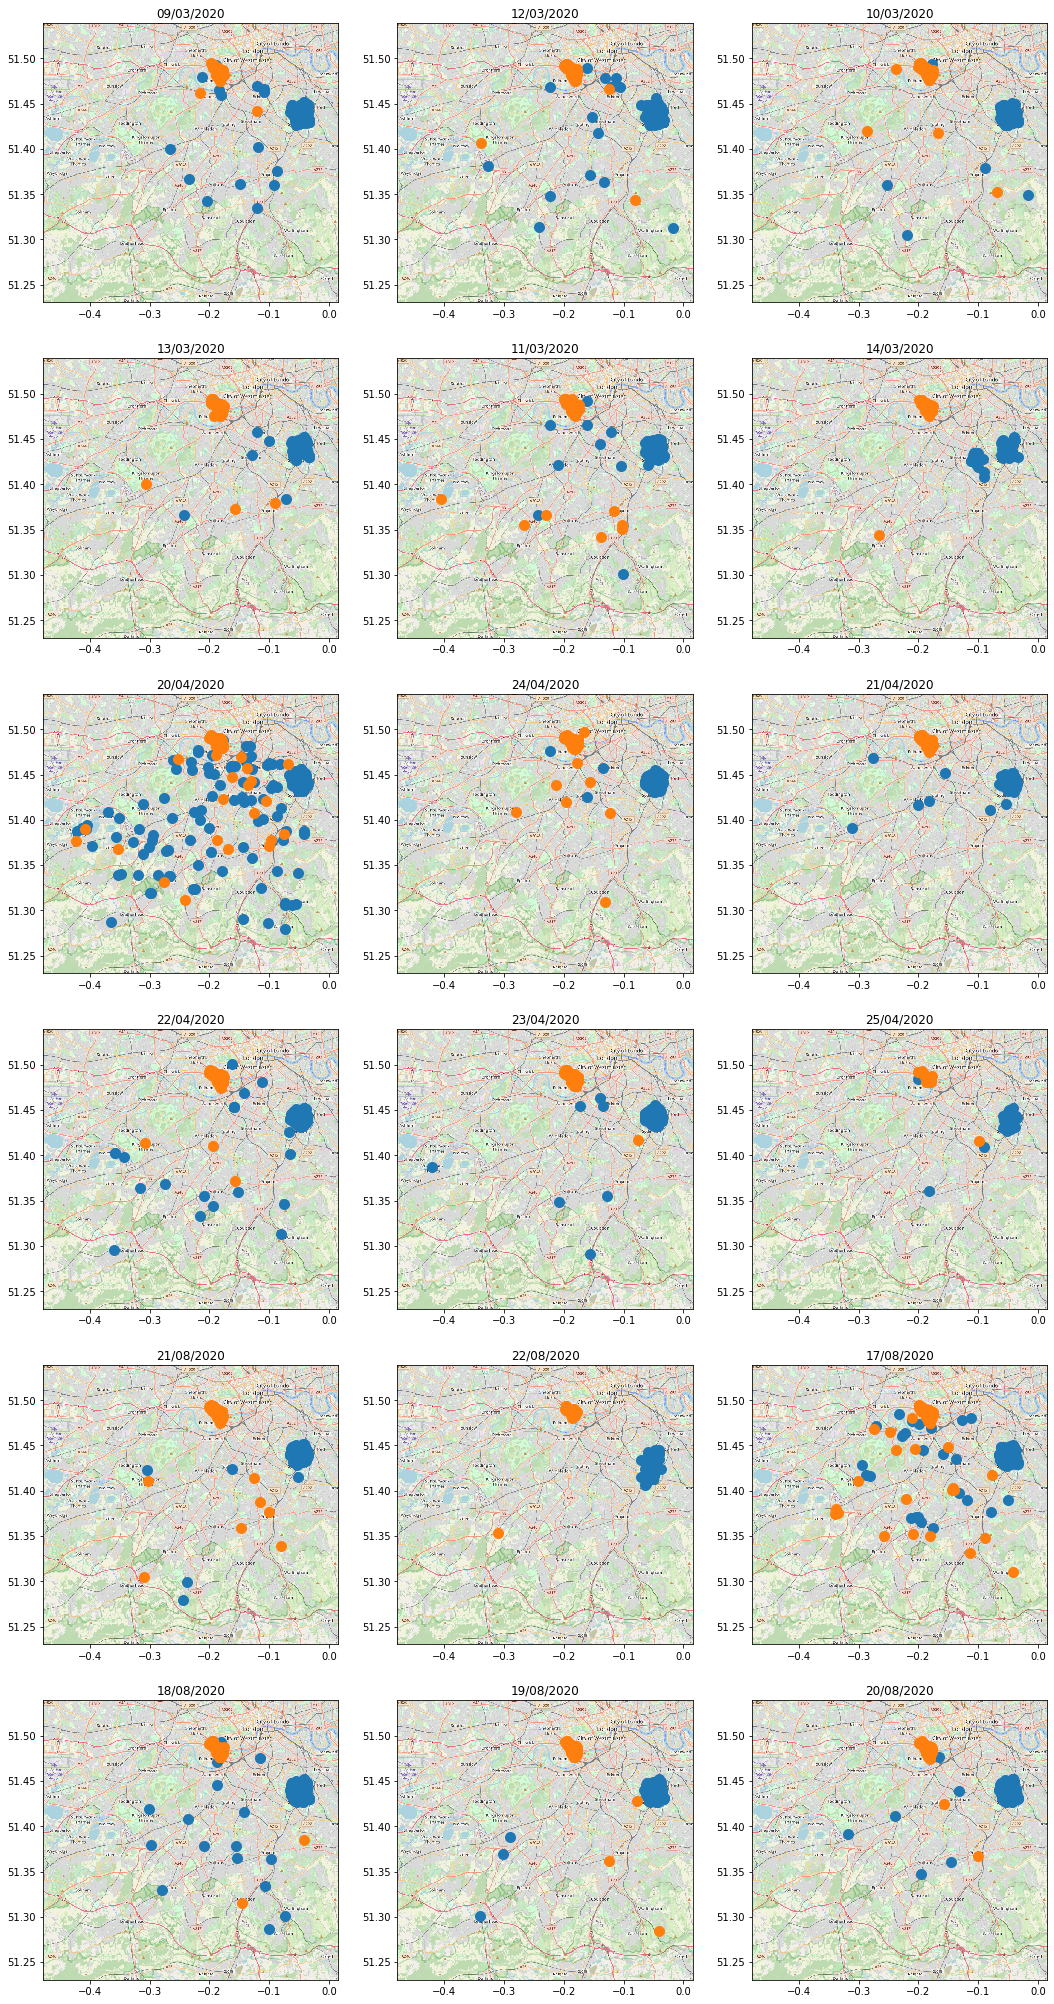

In [133]:
London_map_BBox = [-0.4786,0.0158,51.2305,51.5391]
LondonMap = plt.imread("LondonMap.png")
fig,ax = plt.subplots(6,3,figsize=(18,36))
for j in np.arange(2):
    Dates = [keys for keys in DriverRoutesLong[j]]
    for k in np.arange(len(Dates)):
        ax[int(k/3)][k%3].imshow(LondonMap, extent = London_map_BBox, aspect = 'auto')
        ax[int(k/3)][k%3].scatter(DriverRoutesLong[j][Dates[k]],DriverRoutesLat[j][Dates[k]],100,color='C%d'%j)
        ax[int(k/3)][k%3].set(title='%s'%Dates[k],xlim=London_map_BBox[:2],ylim=London_map_BBox[2:])

[53.55091381, -2.52338115]


[(53.3653, 53.6593), (-2.6779, -2.1835), Text(0.5, 1.0, 'test')]

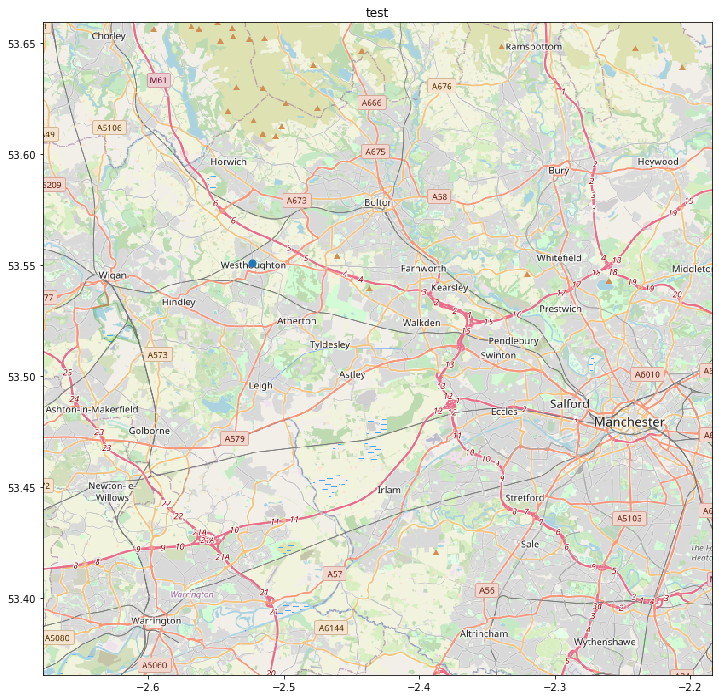

In [124]:
GM_map_BBox = [-2.6779,-2.1835,53.3653,53.6593]
GMmap = plt.imread("GMmap.png")
fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.imshow(GMmap, extent = GM_map_BBox, aspect = 'auto')

home = pc_dict['BL5 3TE']
print(home)
ax.scatter([home[1]],[home[0]],50)
ax.set(title='test',xlim=GM_map_BBox[:2],ylim=GM_map_BBox[2:])